In [305]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import make_scorer, mean_squared_log_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from xgboost import XGBRegressor

In [3]:
data_folder = '/Users/mirimichaeli/projects/ML_learning/house-prices-advanced-regression-techniques'

In [4]:
df_train = pd.read_csv(os.path.join(data_folder,'train.csv'))
df_train = df_train.drop(['Id'], axis=1)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_test = pd.read_csv(os.path.join(data_folder,'test.csv'))
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [13]:
%cat /Users/mirimichaeli/projects/ML_learning/house-prices-advanced-regression-techniques/data_description.txt
#### 
# notes about interesting features to pay attention or act:
# MSSubClass - categorical but contains numbers
# Alley and similar mostly NA!
# LotShape - ordinal
# Utilities - categorical, containing combination of features, it can be ordinal (from least untilities- only electricity to all utilities, or it can be one-hot transformed?)
# LandSlope - ordinal (slope)
# Condition1 + Condition2 - I think should be transformed into one-hot or even be discarded
# Exterior1st + Exterior2nd - same as above
# 2ndFlrSF - depends whether there is a second floor.. if not- impute to 0?
# GarageYrBlt - what if no garage
# MiscFeature - Miscellaneous feature not covered in other categories (elevator, tennis court, etc) check distribution, if need to keep and if as is or one-hot
# MoSold and YrSold - DISCARD AS THIS IS TARGET LEAKAGE (prediction will not have these values upfront)
# SaleType and SaleCondition - DISCARD - I'm not sure when these data are given so better give up (I don't see the relevancy to sale price though)
# BsmtCond and all related columns (*Bsmt*), how many don't have basement, consider what to do with NA
# TotalBsmtSF if no basement, maybe impute 0 if values are NA
      

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### EDA

In [15]:
df_train.shape

(1460, 80)

In [169]:
df_train.describe().T
# df_train.describe().iloc[0].value_counts()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [42]:
# Number of missing values in each column of training data
missing_val_count_by_column = df_train.isnull().sum()
print(missing_val_count_by_column[missing_val_count_by_column > 0]) # 1460 rows total

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
# According to the above, get the almost empty columns:
cols_with_missing = missing_val_count_by_column[missing_val_count_by_column > (df_train.shape[0]*0.4)]
cols_with_missing_values = list(cols_with_missing.index) # ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
# TODO try with discard these, and try with impute some string as "NO_x" where x is the relevant column item

In [8]:
# Gini Index: The Gini index is a measure of inequality often used in economics. 
# It can also be applied to assess variability in categorical data. 
# The Gini index ranges from 0 to 1, where 1 represents perfect equality (high variability) and 0 represents maximum inequality (low variability).

def calculate_gini_index(column):
    value_counts = column.dropna().value_counts() # without NA
    total_samples = len(column)
    gini_index = 0
    
    for count in value_counts:
        probability = count / total_samples
        gini_index += probability * (1 - probability)
    
    return gini_index

inequality_cols_gini = [col for col in df_train.columns if calculate_gini_index(df_train[col]) < 0.5]
# remove from list the columns that are mostly empty:
for name_col in inequality_cols_gini:
    if name_col in cols_with_missing_values:
        inequality_cols_gini.remove(name_col)
        
inequality_cols_gini

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal',
 'SaleType',
 'SaleCondition']

In [9]:
# get columns that most frequent value is much more frequent than the second most frequent:
suspicious_low_variability_features = [col for col in df_train.columns.to_list() 
 if df_train[col].value_counts().iloc[0] >= sum(~(df_train[col].isna())) * 0.75 
 and df_train[col].value_counts().iloc[1] < sum(~(df_train[col].isna())) * 0.25]

# remove from list the columns that are mostly empty:
for name_col in suspicious_low_variability_features:
    if name_col in cols_with_missing_values:
        suspicious_low_variability_features.remove(name_col)
        
suspicious_low_variability_features

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SaleType',
 'SaleCondition']

In [10]:
set(inequality_cols_gini)-set(suspicious_low_variability_features) # how the two methods to identify inequality differ

{'BsmtFullBath', 'Fence', 'HalfBath', 'LotConfig', 'LotShape'}

In [294]:
#Get the list of all numeric columns 
numeric_features = df_train._get_numeric_data().columns.to_list()
#Get the list of all categorial columns 
categorial_features =  list(set(df_train.columns) - set(numeric_features))


#### First visualization:
for numeric features - histogram / boxplot

for categorical features - count barplot

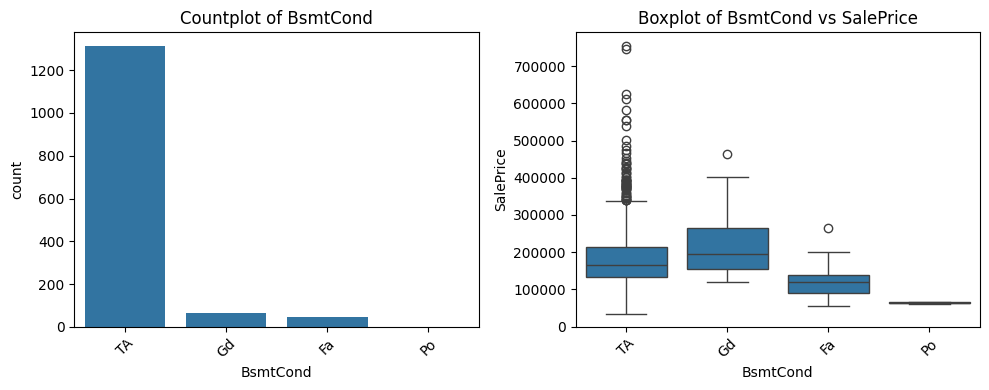

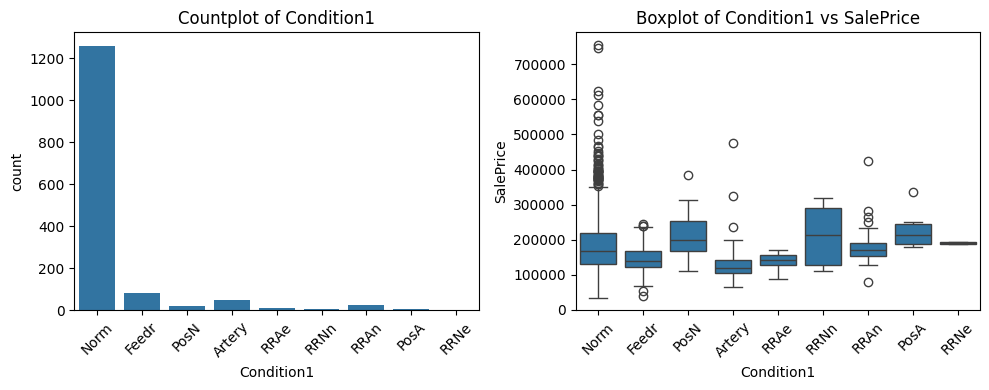

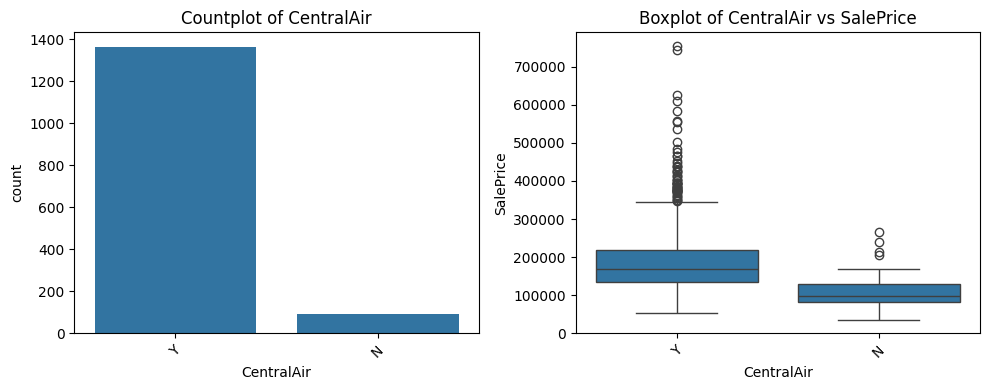

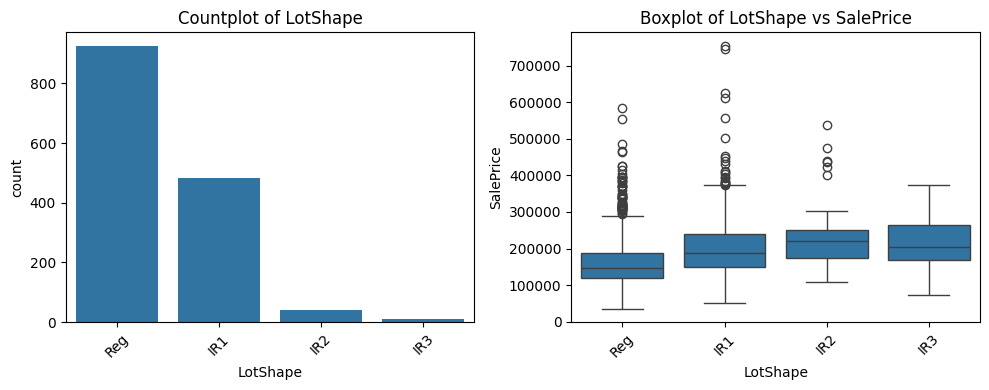

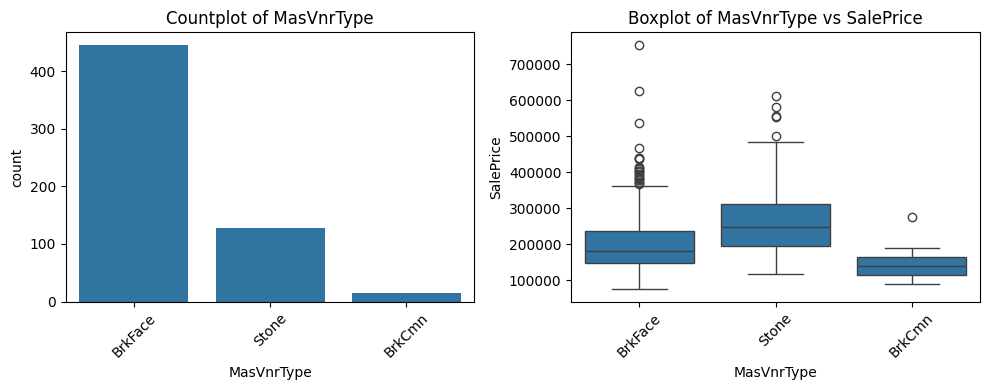

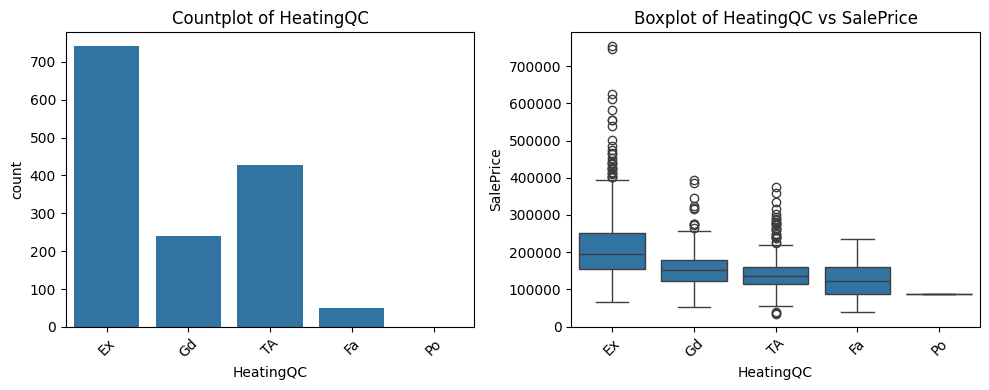

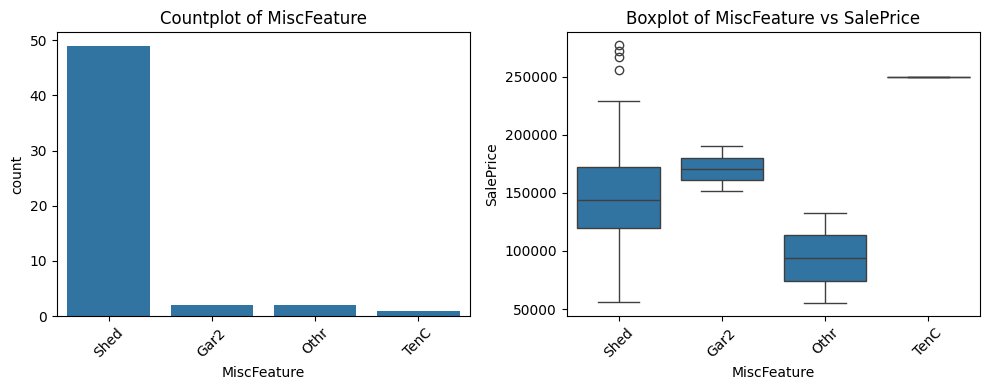

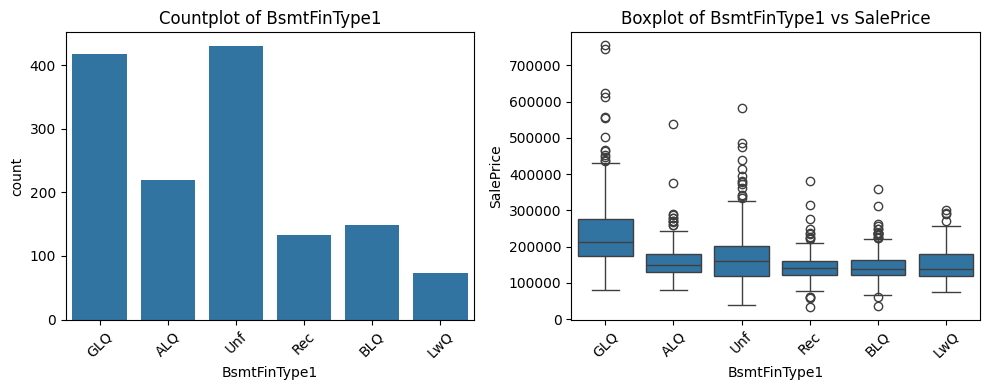

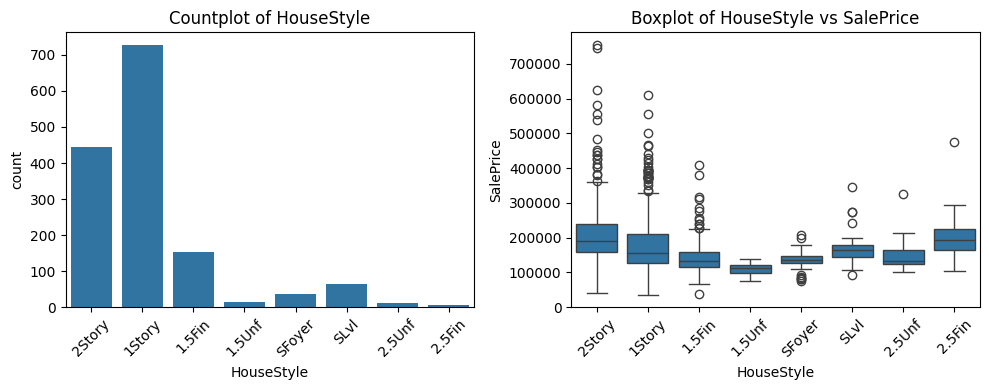

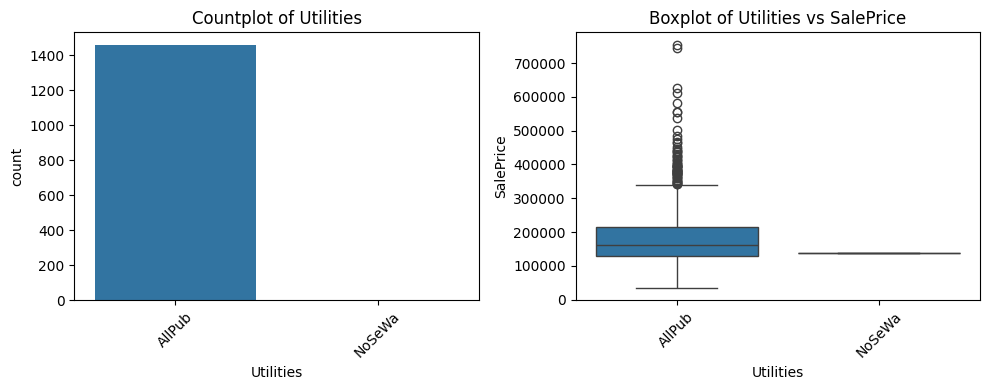

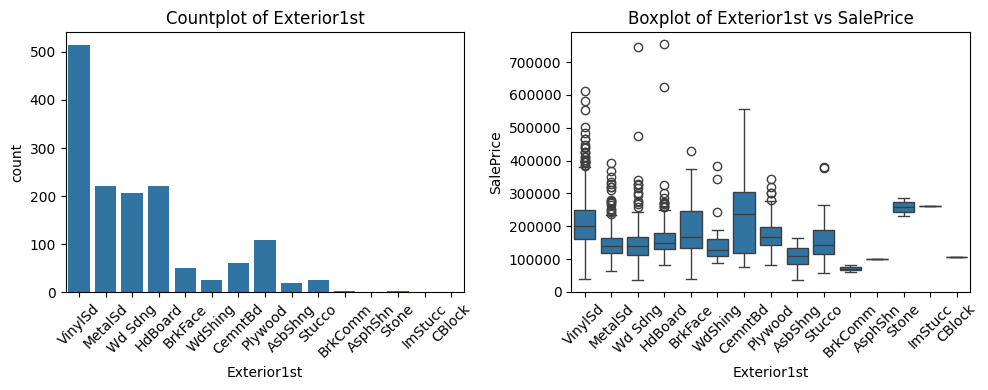

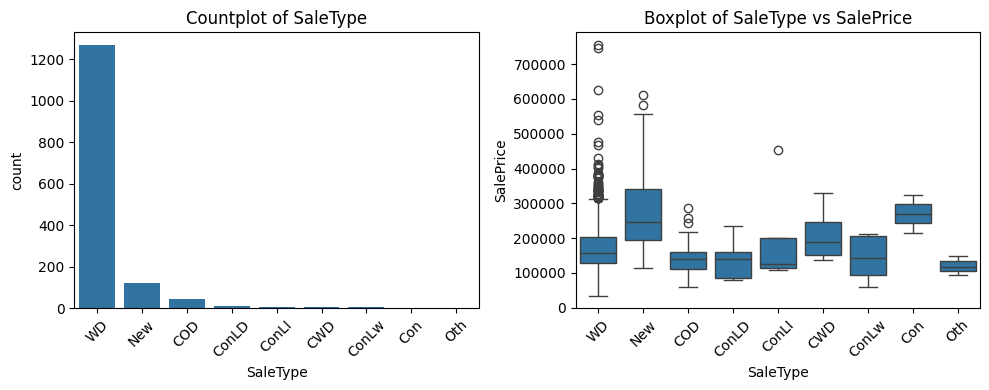

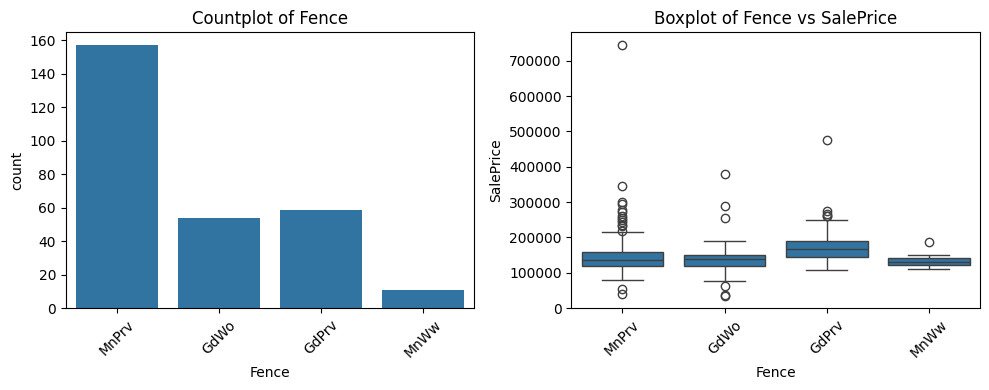

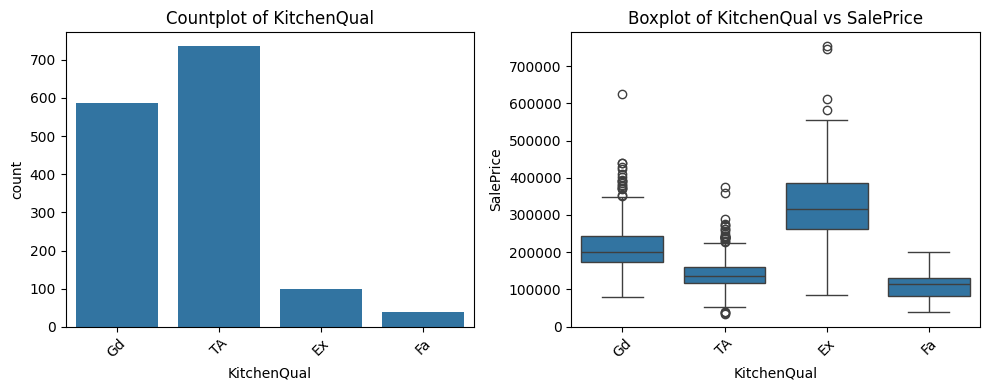

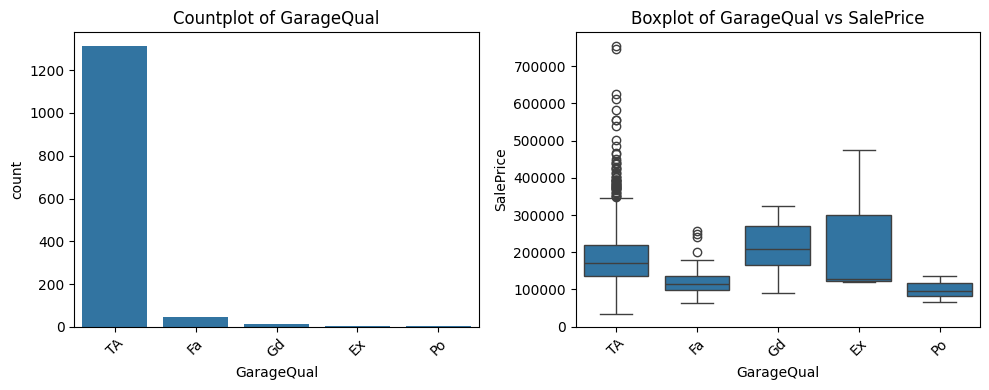

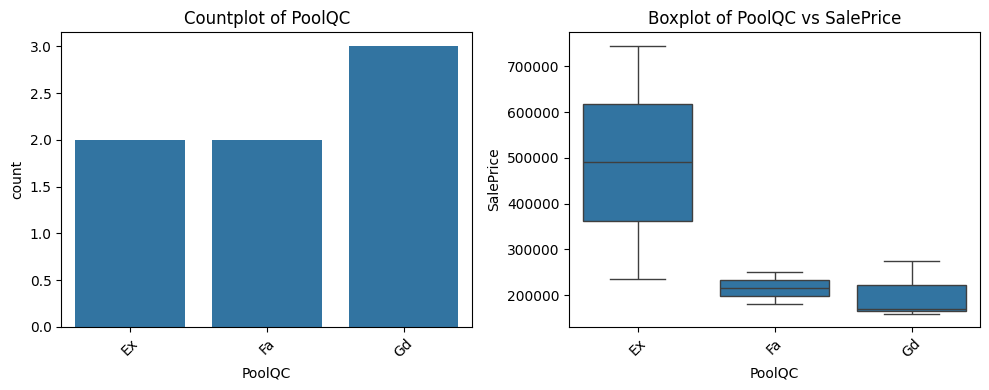

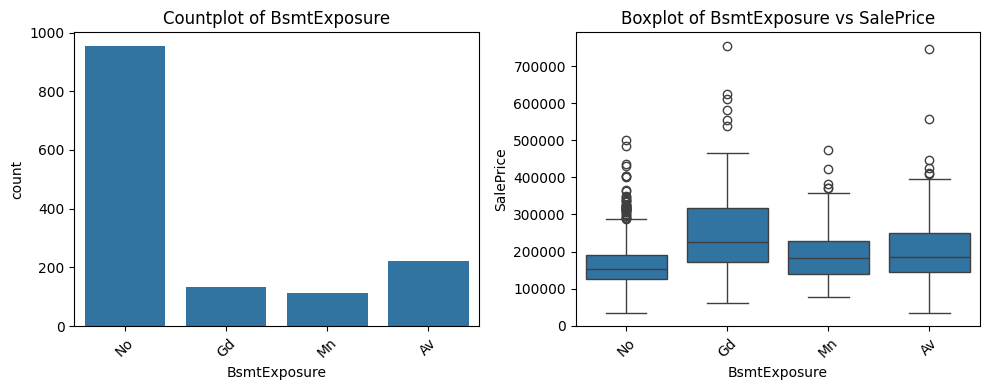

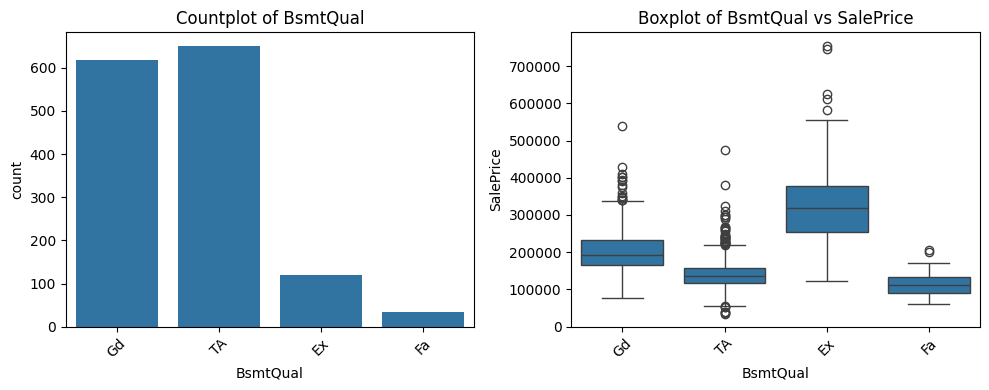

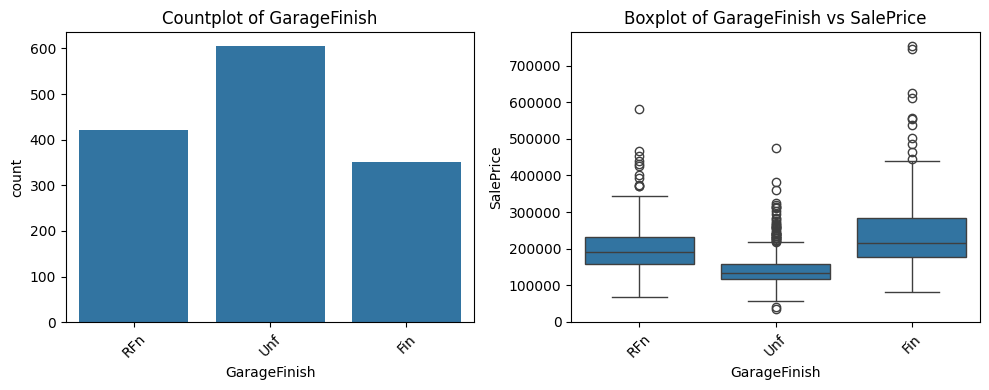

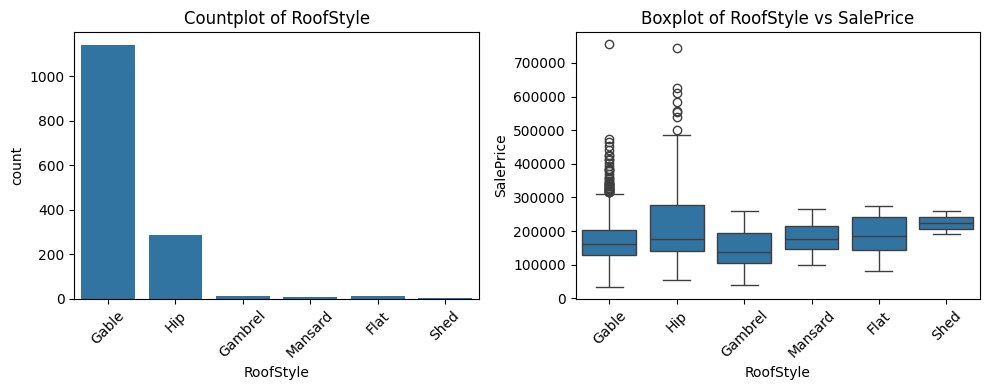

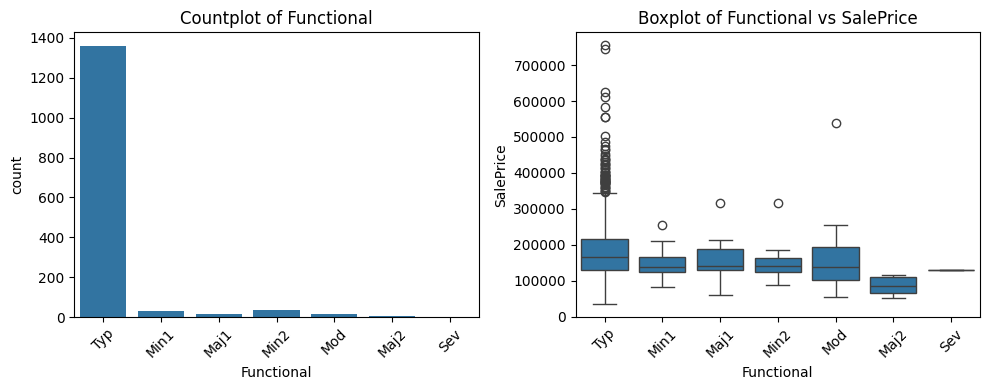

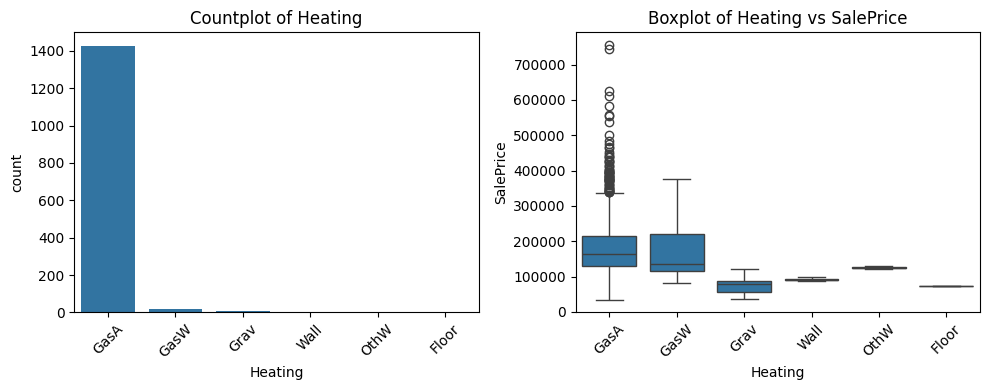

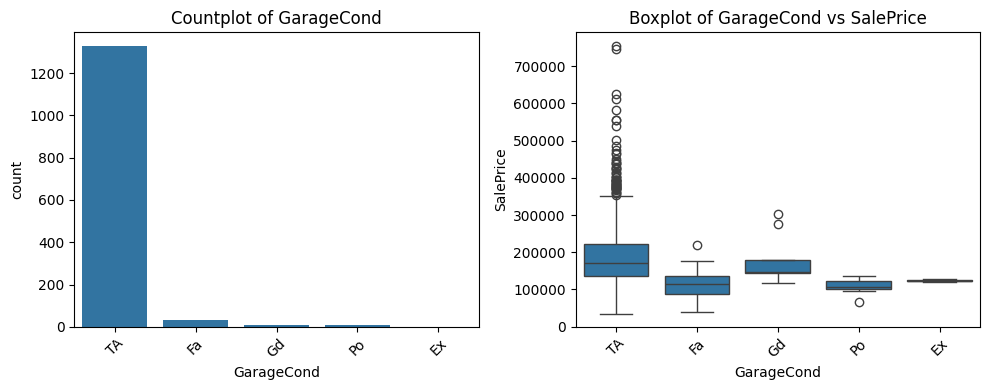

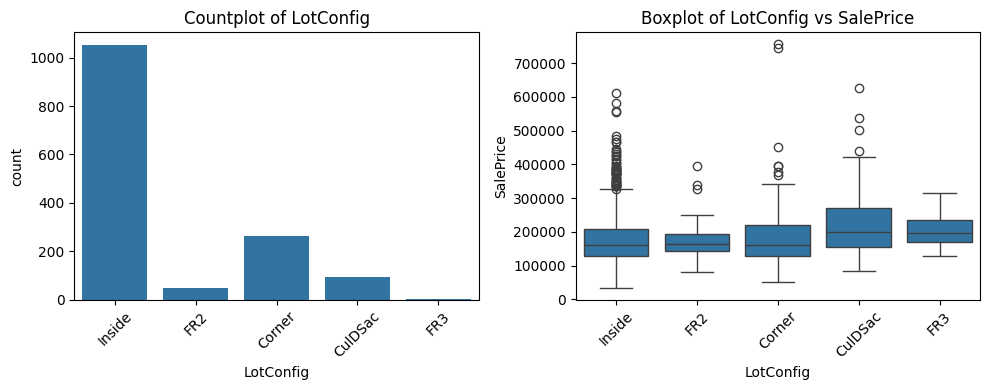

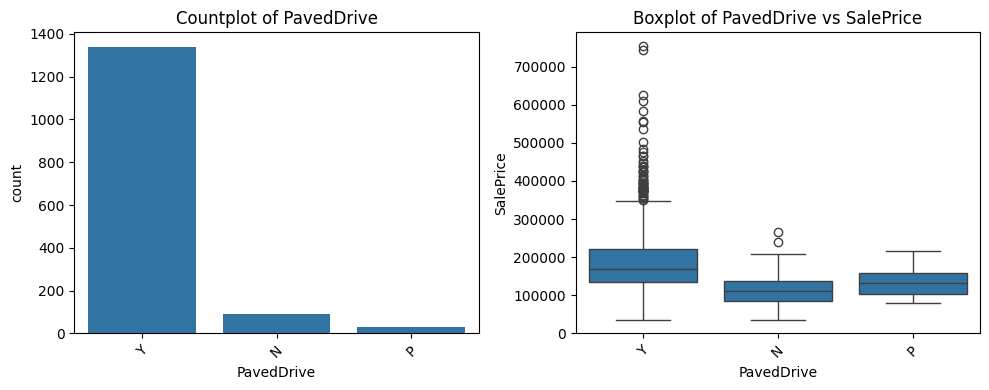

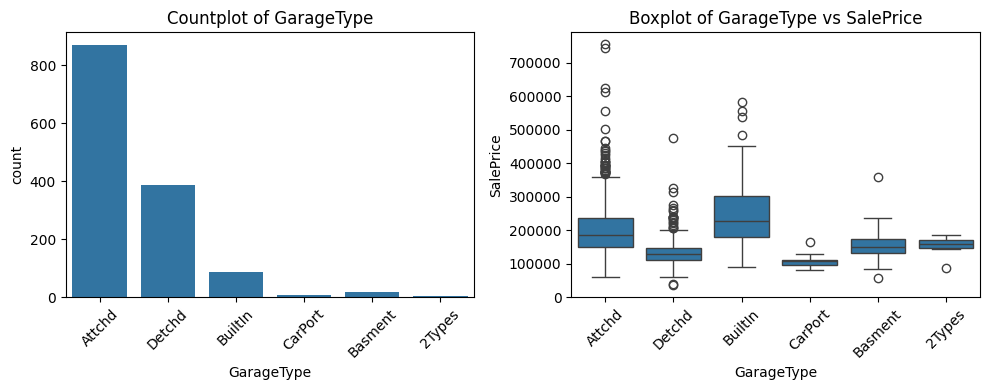

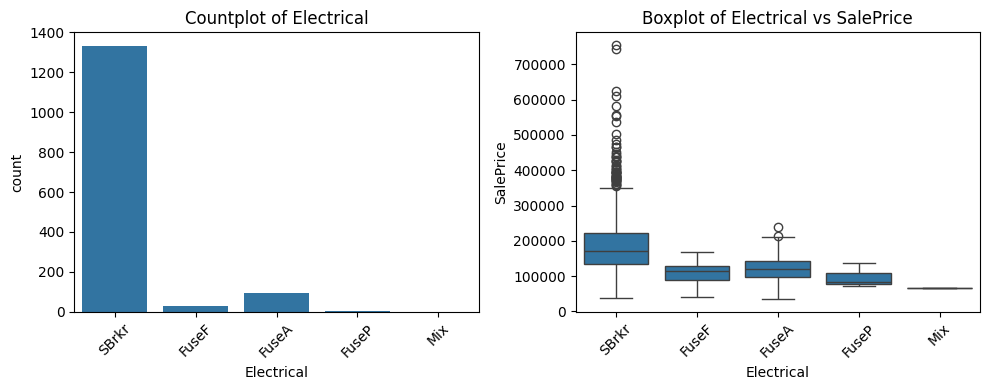

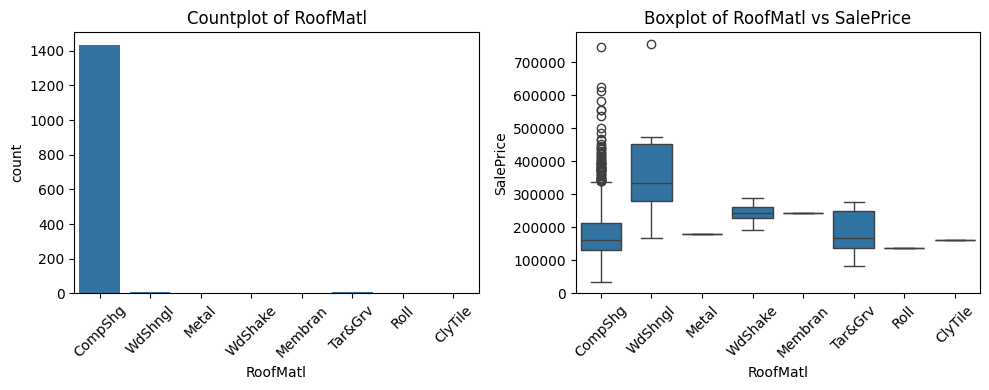

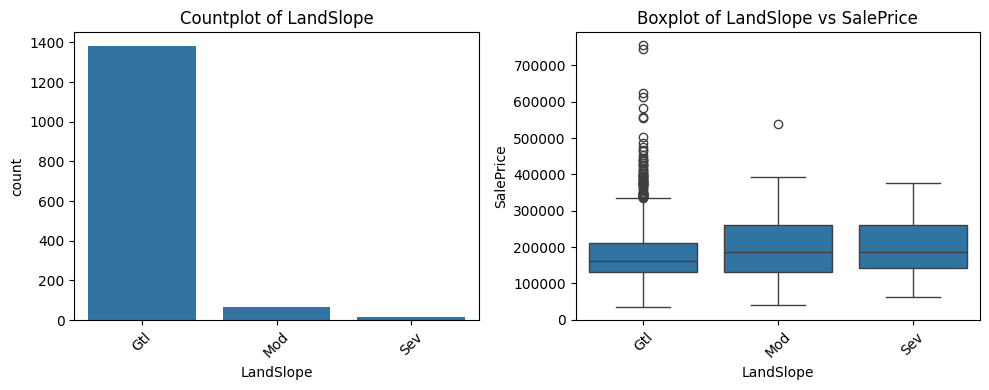

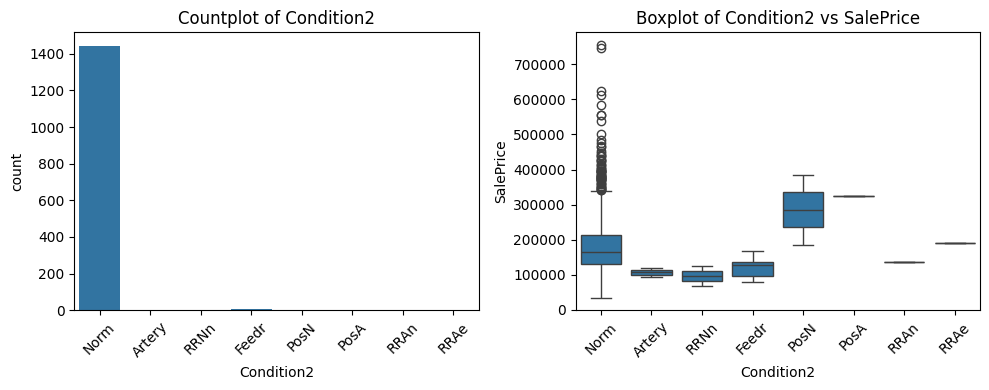

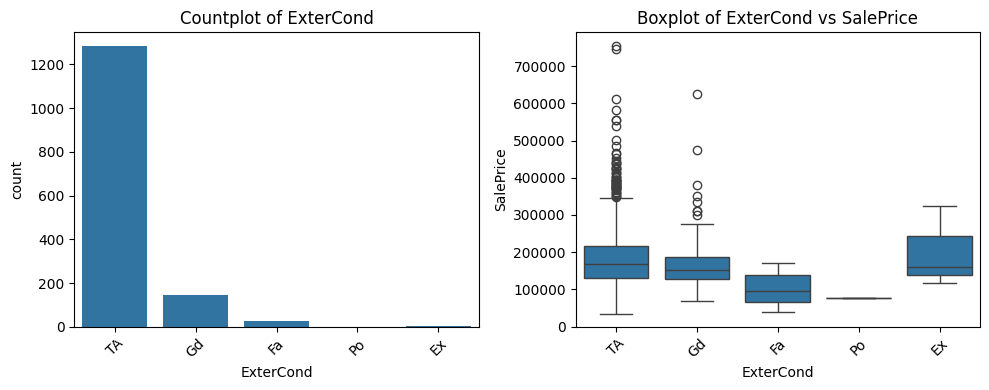

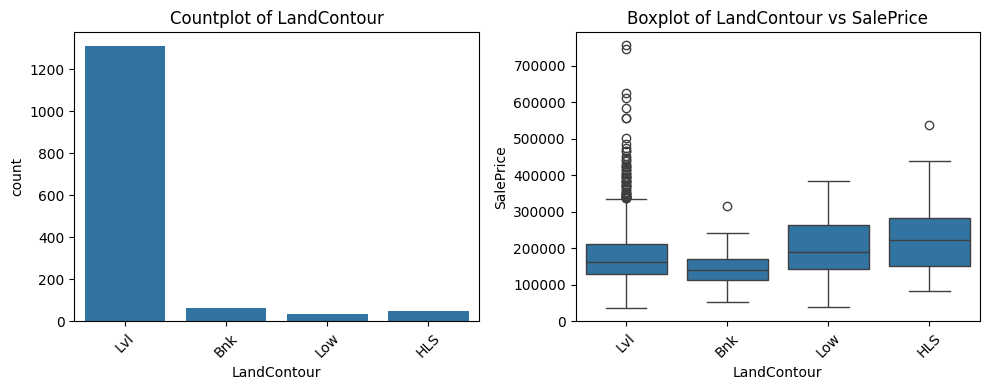

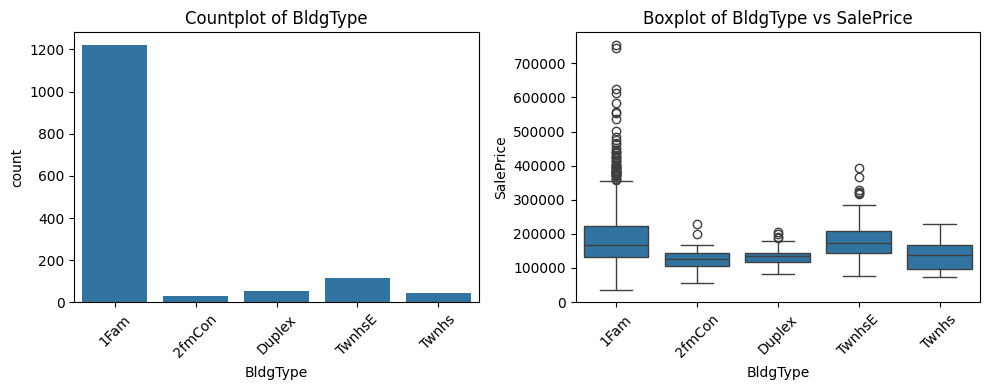

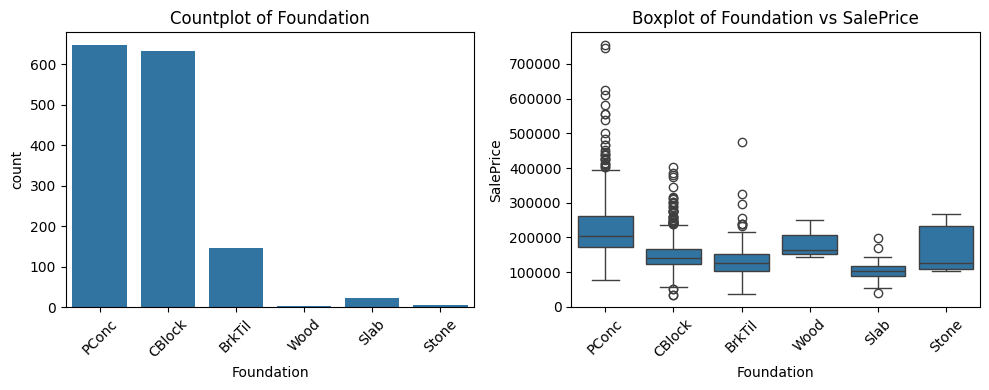

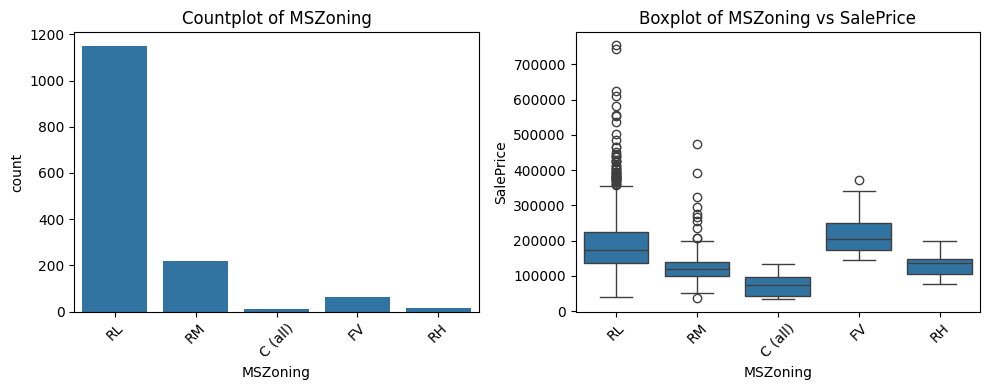

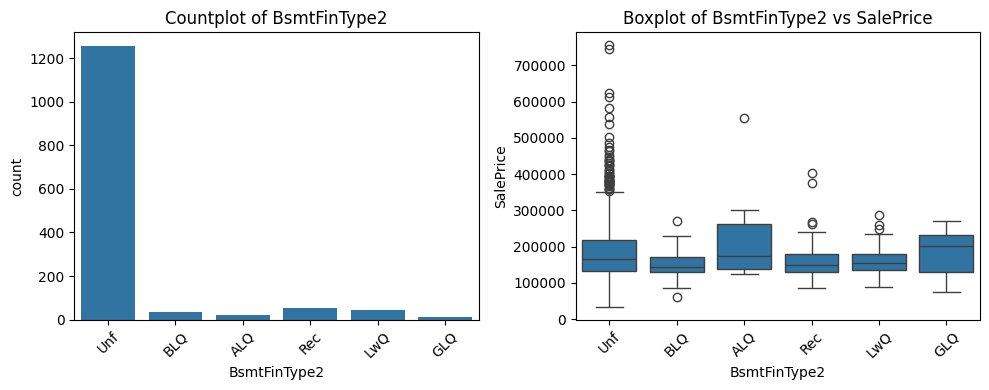

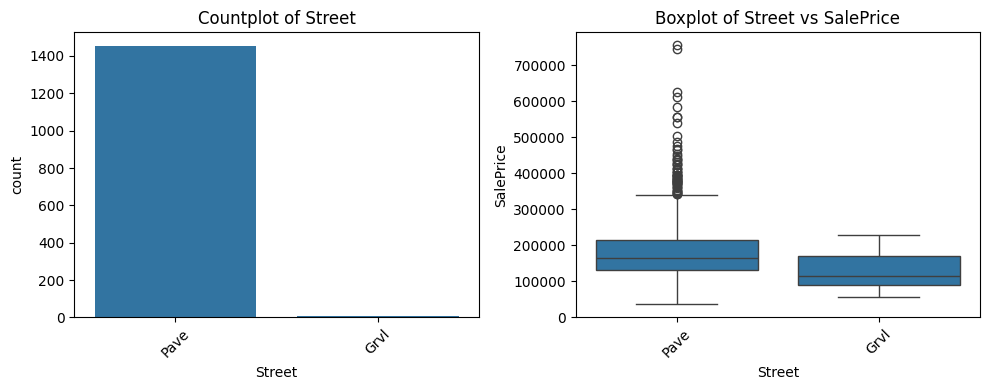

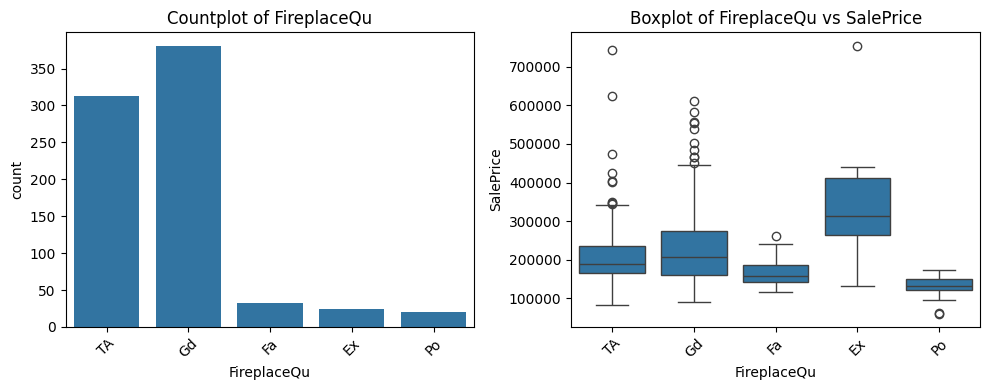

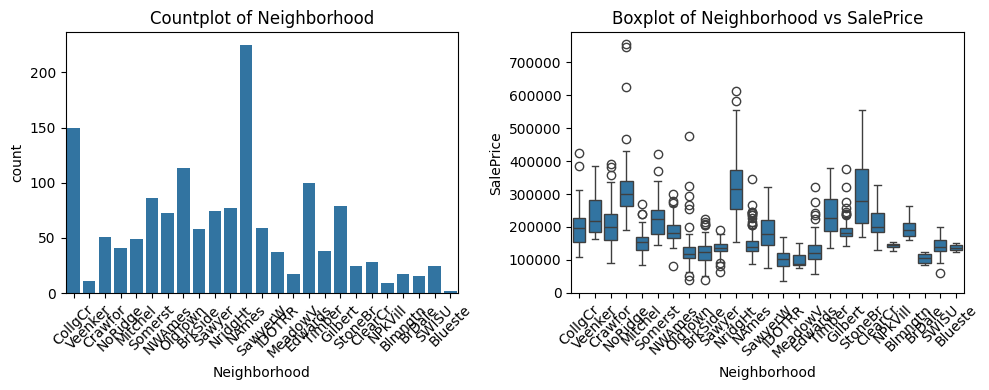

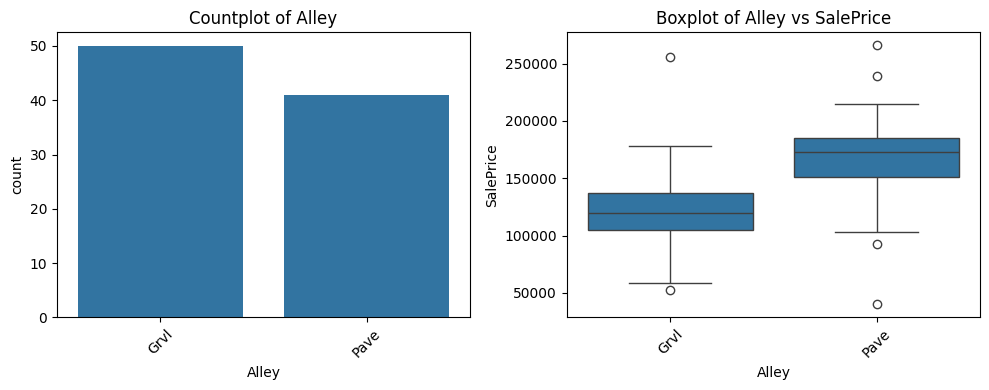

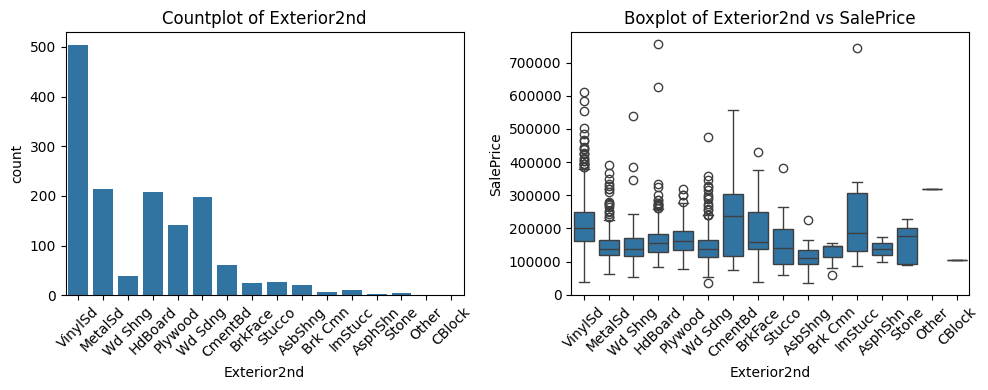

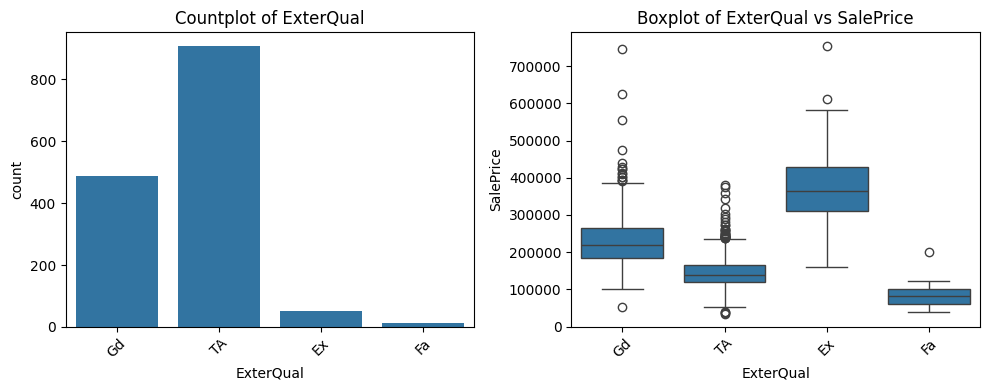

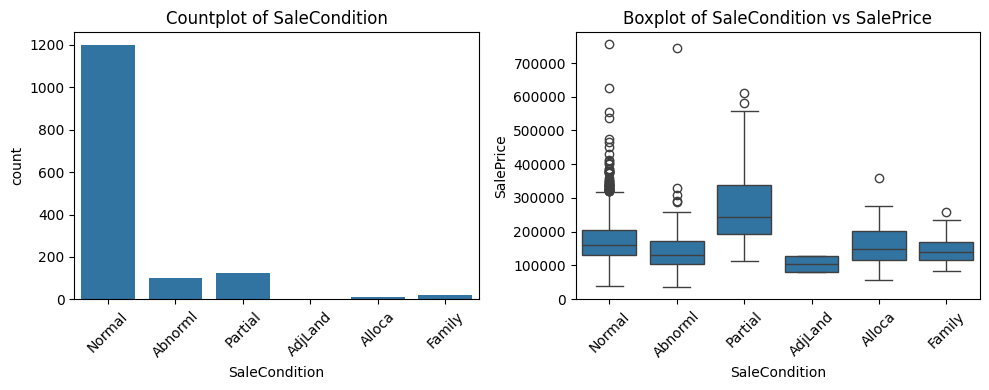

In [41]:
for col in categorial_features:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Countplot: Display the number of samples for each category.
    sns.countplot(x=col, data=df_train, ax=axes[0])
    axes[0].set_title(f'Countplot of {col}')
    
    # Boxplot: Display the SalePrice distribution for each category. 
    sns.boxplot(x=col, y='SalePrice', data=df_train, ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} vs SalePrice')
    
    # Rotate x-axis labels in all subplots to 45 degrees
    for ax in axes:
        ax.tick_params(axis='x', labelrotation=45)
    
    plt.tight_layout()
    plt.show()

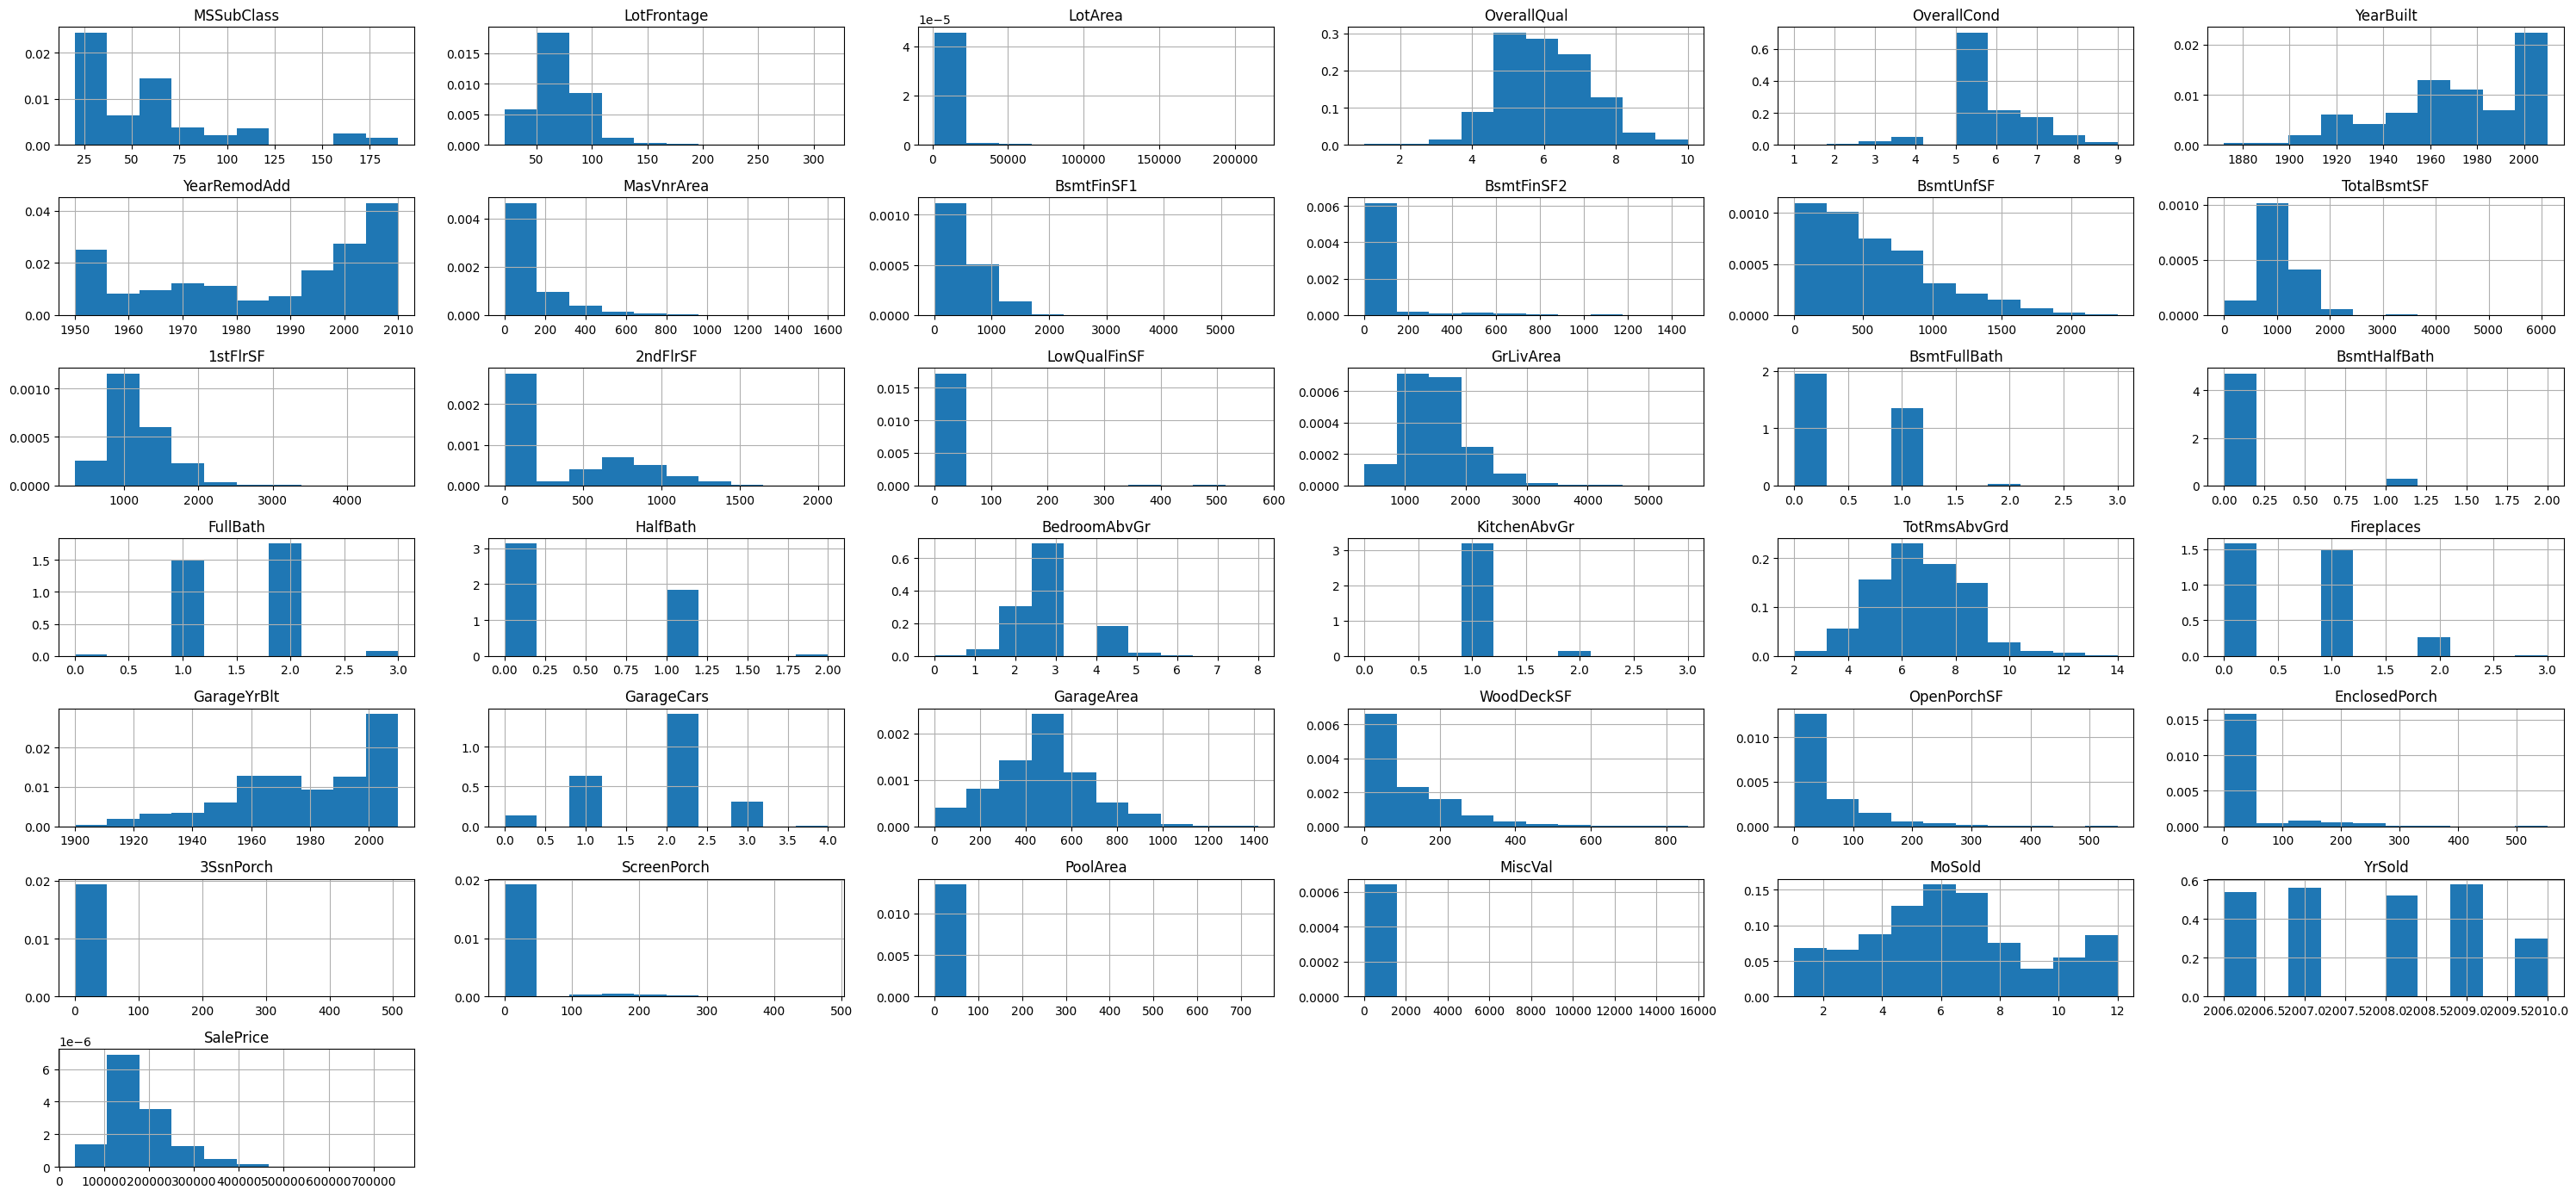

In [28]:
histograms = df_train[numeric_features].hist(figsize=(30,14), density=True)
plt.tight_layout()

#### correlation between features

In [119]:
df_train[numeric_features].corr()#['SalePrice'] 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [297]:
# Functions to find the most correlated features.

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations:")
print(get_top_abs_correlations(df_train[numeric_features], 10))

Top Absolute Correlations:
GarageCars    GarageArea      0.831481
YearBuilt     GarageYrBlt     0.825667
TotalBsmtSF   1stFlrSF        0.822469
GrLivArea     TotRmsAbvGrd    0.820975
OverallQual   SalePrice       0.787228
GrLivArea     SalePrice       0.708172
2ndFlrSF      GrLivArea       0.683441
BedroomAbvGr  TotRmsAbvGrd    0.665963
BsmtFinSF1    BsmtFullBath    0.647400
YearRemodAdd  GarageYrBlt     0.642277
dtype: float64


#### for each feature (numeric, categorical), learn the distribution, decide on imputation or removing the sample with missing value.
if imputation, check few parameters to decide to what value: if this feature depends on another feature, or stands for its own

In [111]:
# Number of missing values in each categorical column of training data
missing_val_count_by_column_categorical = df_train[categorial_features].isnull().sum()
missing_val_categorical = missing_val_count_by_column_categorical[missing_val_count_by_column_categorical > 0].sort_values()
missing_val_categorical

Electrical         1
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
BsmtExposure      38
BsmtFinType2      38
GarageQual        81
GarageFinish      81
GarageCond        81
GarageType        81
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

There are 3 levels of missing data:

Level 1 is the features with mostly NA

Level 2 is with ~half the data missing in the feature

Level 3 is features with low percent of missing data

In [56]:
mostly_missing_values_categorical = missing_val_categorical[
    missing_val_categorical > df_train.shape[0]*0.8].index.tolist()
mostly_missing_values_categorical

# option 1 - remove these features
# option 2 - impute into "No_x" where x is the feature
# class to deal with these features is deal_with_mostly_na_categorical()

# MiscFeature - discard
# PoolQC, Alley - Fill NA with No_x
# Fence: GdPrv	Good Privacy
    #    MnPrv	Minimum Privacy
    #    GdWo	Good Wood
    #    MnWw	Minimum Wood/Wire
    # combine MnPrv+GdWo+MnWw into one category and the other category stays GdPrv. Fill NA with No_Fence. 
    # Because the 3 feature types show same correlation with the price.

['MiscFeature', 'Fence', 'PoolQC', 'Alley']

In [59]:
few_missing_values_categorical = missing_val_categorical[
    missing_val_categorical < df_train.shape[0]*0.1]#.index.tolist()
few_missing_values_categorical.sort_values()
# All Garage* NA are coming from houses with no garage, and given that one numerical feature also related to garage (GarageYrBlt)
# and cannot be imputed, I will discard *samples* with NA
# all Bsmt* NA are imputed
# Electrical will be imputed to the most frequent

Electrical       1
BsmtCond        37
BsmtFinType1    37
BsmtQual        37
BsmtExposure    38
BsmtFinType2    38
GarageQual      81
GarageFinish    81
GarageCond      81
GarageType      81
dtype: int64

In [96]:
# the rest of categorical missing values (intermediate level), will be imputed
list(set(missing_val_categorical.index)-set(few_missing_values_categorical.index.tolist())-set(mostly_missing_values_categorical))


['MasVnrType', 'FireplaceQu']

In [97]:
missing_val_count_by_column_numeric = df_train[numeric_features].isnull().sum()
missing_val_numeric = missing_val_count_by_column_numeric[missing_val_count_by_column_numeric > 0]
missing_val_numeric

# GarageYrBlt rows with NA will be discarded (and so all the other NA related features)
# MasVnrArea - impute to 0
# LotFrontage: Linear feet of street connected to property:
# based on the somewhat normal distribution the feature presents, im[ute missing values to 0, meaning no street connected to the property.
# TODO SimpleImputer to 0

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [110]:
# distribution of LotFrontage:
df_train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

### Pipeline to process and run all transformations:

In [143]:
# rows ( samples ) to discard (filled with 0 for test set):
# All Garage* NA
categorical_rows_to_drop = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
numerical_rows_to_drop = ['GarageYrBlt', 'GarageCars', 'GarageArea']
for column in numerical_rows_to_drop:
  df_train.dropna(subset=[column], inplace=True)
  df_test.loc[df_test[column].isna(),column] = 0
for col in categorical_rows_to_drop: 
  df_train = df_train.fillna({col: df_train[col].mode()[0]})
  df_test = df_test.fillna({col: df_test[col].mode()[0]})

In [666]:
class CustomFeatureEngineer(BaseEstimator, TransformerMixin):
    """A base class with a placeholder fit method for feature engineering transformers."""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X
    
    
class CreateCopy(CustomFeatureEngineer):
    def transform(self, X, y=None):
        """Return a copy of the DataFrame."""
        return X.copy()
    

class ImputeMissingValues(CustomFeatureEngineer):
    def transform(self, X, y=None):
        # """Impute missing values for specific columns."""
        # Creating a dictionary with column names and values for filling.
        fill_values = {
            'Alley': 'No_Alley',
            'PoolQC': 'No_Pool',
            'Fence': 'No_Fence',
            'Electrical': 'SBrkr', # most frequent
            'MasVnrType': 'No_Masonry',
            'FireplaceQu': 'No_Fireplace',
            'BsmtCond': 'No_Basement',
            'BsmtQual': 'No_Basement',
            'BsmtExposure': 'No_Basement',
            'BsmtFinType1': 'No_Basement',
            'BsmtFinType2': 'No_Basement',
            'MasVnrArea': 0,
            'LotFrontage': 0
            
        }
        # Filling missing values in the respective columns.
        X.fillna(value=fill_values, inplace=True)
        return X

    
class ChangingEntries(CustomFeatureEngineer):
    def transform(self, X, y=None):
        # Put here the new values for each column and value
        def transform_Fence(fence):
            # Fence: 
            #    GdPrv	Good Privacy
            #    MnPrv	Minimum Privacy
            #    GdWo	Good Wood
            #    MnWw	Minimum Wood/Wire
            # combine MnPrv+GdWo+MnWw into one category and the other category stays GdPrv. Fill NA with No_Fence. 
            # Because the 3 feature types show same correlation with the price.
            if fence in ['GdPrv']:
                return 'GdPrv'
            elif fence in ['MnPrv', 'GdWo', 'MnWw']:
                return 'MnPrv_GdWo_MnWw'
            else:
                return fence

        X['Fence'] = X['Fence'].apply(transform_Fence)

        # In the train set there is one row which has BsmtFinSF2 but still NA in BsmtFinType2, 
        # so if there are data on type 2 the NA needs to be imputed to Unf
        X.loc[X["BsmtFinType2"].isna() & (X['BsmtFinSF2']!=0),'BsmtFinType2'] = 'Unf'

        return X

class DropUnnecessaryFeatures(CustomFeatureEngineer):
    discard_features = ['MoSold','YrSold','SaleType','SaleCondition', 'MiscFeature']
    def transform(self, X, y=None):
        """Removing due to weak visual differences and significant class imbalance: 'MiscFeature' 
        Features that are considered contamination/ data leakage: 'MoSold','YrSold','SaleType','SaleCondition'
        Also removing features that were used for transformations in prior steps."""
        return X.drop(self.discard_features, axis=1, inplace=True) # if creating a copy, remove the "inplace=True"
           

In [863]:
# transform the categorical columns into numeric for the model:
# categorical_features = df_train.select_dtypes(['object']).columns
# ordinal_features = ['LotShape', 'LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  
#                     'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']
# one_hot_features = []
# label_features = list(set(categorical_features)-set(ordinal_features)-set(one_hot_features)-{'SalePrice'})

# Preprocessing for categorical data
        
class OrdinalTransformation(CustomFeatureEngineer):
    def __init__(self) -> None:
        super().__init__()
        self.ordinal_features = ['LotShape', 'LandSlope', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',  
                            'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC']
        self.one_hot_features = []
        self.label_features = []

# Define the custom mapping of ordinal features as a dictionary
    custom_mapping = {
        'LotShape': {
            'Reg': 0,
            'IR1': 1,
            'IR2': 2, 
            'IR3': 3  
                },
        'LandSlope': {
            'Gtl': 1,
            'Mod': 2,
            'Sev': 3
        },
        'ExterQual': {
            'Ex': 4,
            'Gd': 3,
            'TA': 2,
            'Fa': 1,
            'Po': 0
        },
        'BsmtQual': {
            'Ex': 4,
            'Gd': 3,
            'TA': 2,
            'Fa': 1,
            'Po': 0,
            'No_Basement': -1
        },
        'BsmtCond': {
            'Ex': 4,
            'Gd': 3,
            'TA': 2,
            'Fa': 1,
            'Po': 0,
            'No_Basement': -1
        },
        'BsmtExposure': {
                'Gd': 3,
                'Av': 2,
                'Mn': 1,
                'No': 0,
                'No_Basement': -1
        },
        'BsmtFinType1': {
                'GLQ': 5,
                'ALQ': 4,
                'BLQ': 3,
                'Rec': 2,
                'LwQ': 1,
                'Unf': 0,
                'No_Basement': -1
        },
        'BsmtFinType2': {
                'GLQ': 5,
                'ALQ': 4,
                'BLQ': 3,
                'Rec': 2,
                'LwQ': 1,
                'Unf': 0,
                'No_Basement': -1
        },
        'HeatingQC':{
                'Ex': 4,
                'Gd': 3,
                'TA': 2,
                'Fa': 1,
                'Po': 0
        },
        'KitchenQual':{
                'Ex': 4,
                'Gd': 3,
                'TA': 2,
                'Fa': 1,
                'Po': 0
        },
        'FireplaceQu': {
                'Ex': 4,
                'Gd': 3,
                'TA': 2,
                'Fa': 1,
                'Po': 0,
                'No_Fireplace': -1
        },
        'GarageFinish': {
                'Fin': 2,
                'RFn': 1,
                'Unf': 0,
                'NA': -1
        },
        'GarageQual': {
                'Ex': 4,
                'Gd': 3,
                'TA': 2,
                'Fa': 1,
                'Po': 0,
                'NA': -1
        },
        'GarageCond': {
                'Ex': 4,
                'Gd': 3,
                'TA': 2,
                'Fa': 1,
                'Po': 0,
                'NA': -1
        },
        'PavedDrive': {
                'Y': 2,
                'P': 1,
                'N': 0,
        },
        'PoolQC': {
                'Ex': 4,
                'Gd': 3,
                'TA': 2,
                'Fa': 1,
                'No_Pool': -1
        }
    }

    label_features = []

    # Define a transformation function that uses the custom mapping
    def custom_transform(self, X):
        for column, mapping in self.custom_mapping.items():
            X[column] = X[column].map(mapping)
        return X
    
    def get_labler_pipeline(self):
        categorical_transformer = Pipeline([('labeler', OrdinalEncoder())])
        return categorical_transformer
    
    def get_ordinal_pipeline(self):
        ordinal_transformer = Pipeline([('ordinal', FunctionTransformer(self.custom_transform))])
        return ordinal_transformer

    # Custom function to calculate columns based on data type
    def select_categorical_features(self, X):
        self.categorical_features = X.select_dtypes(['object']).columns
        self.label_features = list(set(self.categorical_features)-set(self.ordinal_features)-set(self.one_hot_features)-{'SalePrice'})
        return self.label_features
    
    def select_ordinal_features(self, X):
        return self.ordinal_features

# Create the ColumnTransformer
column_transformer = OrdinalTransformation()
categorical_preprocessor = ColumnTransformer(
    transformers=[
        ('categorical_transformer', column_transformer.get_labler_pipeline(), column_transformer.select_categorical_features),
        ('functional_transformer', column_transformer.get_ordinal_pipeline(), column_transformer.select_ordinal_features),
    ],
    remainder='passthrough'
)



In [852]:
# Define the model:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [864]:
# Applying the pipeline:
first_pipeline = Pipeline(steps=[
    # ('create_copy', CreateCopy()),  # Creating a copy
    ('custom_feature_engineer', CustomFeatureEngineer()),  # Here, numerical and categorical features will be separated.
    ('changing_entries', ChangingEntries()),  # Modifying entries.
    ('handle_missing_values', ImputeMissingValues()),  # Handling missing values.
    ('categorical_to_numeric', categorical_preprocessor),  
    ]
)

column_name_extractor_pipeline = Pipeline(steps=[
    ('extract_column_names', FunctionTransformer(lambda x: x.columns, validate=False)),
    ]
)

second_pipeline = Pipeline(steps=[
    ('drop_features', DropUnnecessaryFeatures()),  # Removing unnecessary features.
    # ('model', model)      
    ]
)

In [865]:
# Separate target from predictors
# print(df_train['SalePrice'].isnull().sum()) # check that labels are not missing
y = df_train['SalePrice']
X = df_train.drop(['SalePrice'], axis=1).copy()

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [866]:
cols = column_name_extractor_pipeline.fit_transform(X_train)
transformed_data = first_pipeline.fit_transform(X_train)
# Transform the transformed_data to DataFrame
# Get the column names from the ColumnNameExtractor pipeline
new_columns = column_transformer.label_features + column_transformer.ordinal_features
reminder_cols = [col for col in cols if col not in new_columns]
new_column_order = new_columns + reminder_cols
transformed_df = pd.DataFrame(transformed_data, columns=new_column_order)

# transformed_df

In [867]:
second_pipeline.fit_transform(transformed_df)
transformed_df

,Condition1,GarageType,Electrical,RoofMatl,CentralAir,Heating,MasVnrType,ExterCond,Condition2,LandContour,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,...,1987.0,1.0,504.0,370.0,30.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,4.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,...,1967.0,1.0,384.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,...,2003.0,2.0,438.0,160.0,22.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,4.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,...,2008.0,3.0,776.0,160.0,33.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,4.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,...,1961.0,1.0,368.0,0.0,319.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,2.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,...,1974.0,2.0,484.0,265.0,0.0,0.0,0.0,0.0,648.0,0.0
1099,2.0,1.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,3.0,...,1967.0,1.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,2.0,1.0,4.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,...,2000.0,2.0,499.0,212.0,59.0,0.0,0.0,0.0,0.0,0.0
1101,2.0,5.0,4.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,...,1981.0,1.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [869]:
# Make sure there are no NA in the transformed data
transformed_df.isnull().sum()[transformed_df.isnull().sum()>0]
# TODO make sure numeric

Series([], dtype: int64)

In [870]:
model.fit(transformed_df, y_train)

RandomForestRegressor(random_state=0)

In [872]:
# Transform the test data the same way:
cols = column_name_extractor_pipeline.fit_transform(X_valid)
transformed_test_data = first_pipeline.fit_transform(X_valid)
# Transform the transformed_data to DataFrame
# Get the column names from the ColumnNameExtractor pipeline
new_columns = column_transformer.label_features + column_transformer.ordinal_features
reminder_cols = [col for col in cols if col not in new_columns]
new_column_order = new_columns + reminder_cols
transformed_test_df = pd.DataFrame(transformed_test_data, columns=new_column_order)
second_pipeline.fit_transform(transformed_test_df)
transformed_test_df

,Condition1,GarageType,Electrical,RoofMatl,CentralAir,Heating,MasVnrType,ExterCond,Condition2,LandContour,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,2.0,5.0,2.0,0.0,1.0,0.0,2.0,3.0,2.0,3.0,...,1968.0,1.0,326.0,0.0,0.0,112.0,0.0,0.0,0.0,0.0
1,0.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0,2.0,3.0,...,1941.0,1.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,2.0,3.0,1.0,0.0,2.0,3.0,2.0,3.0,...,1977.0,2.0,534.0,0.0,0.0,0.0,0.0,276.0,0.0,0.0
3,2.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0,2.0,3.0,...,1990.0,2.0,601.0,0.0,51.0,0.0,0.0,190.0,0.0,0.0
4,2.0,1.0,2.0,0.0,1.0,0.0,3.0,3.0,2.0,3.0,...,2006.0,3.0,865.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2.0,5.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,3.0,...,1964.0,1.0,308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,2.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0,2.0,3.0,...,2002.0,2.0,393.0,100.0,75.0,0.0,0.0,0.0,0.0,0.0
273,2.0,1.0,2.0,0.0,1.0,0.0,1.0,3.0,2.0,3.0,...,1998.0,3.0,1069.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0
274,2.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,3.0,...,1965.0,1.0,364.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0


In [873]:
# Make sure there are no NA in the transformed data
transformed_test_df.isnull().sum()[transformed_test_df.isnull().sum()>0]

Series([], dtype: int64)

In [882]:
from sklearn.metrics import mean_absolute_error
preds = model.predict(transformed_test_df)
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17551.903586956523
